<center><h1>Predict Online News Popularity</h1></center>
<center><h2>The News Squad</h2></center>
<center><h4>📸Jingwen Yu, Zhentao Hou, Xiao Chu<center><h4>

<center><h2> Outline 📝</h2></center>

1. Ask - Why we care?  
2. Acquire - Introduce the dataset  
3. Process - EDA and feature engineering  
4. Model - Choose the model based on the evaluation metric  
5. Deliver - Takeaway  

<center><h2>  🧐Ask - Why we care about news popularity  </h2></center>
<br></br>
  
News is a important channel for us to learn what is happening in the world.
\
\
A piece of popular news could lead to a successful advertising or public relation activity, contributing great business values to companies.

 <center><h2> 📩Acquire - Introduce the Dataset </h2></center>
 
1. Number of Features: 58
2. Target Column: Number of Shares
3. Number of Instances: 39644
4. Source: UCI Machine Learning Repository

<center><h2> 📊 Process - EDA and Feature Engineering </h2></center>

<center><h2> Target Exploration--Raw DataSet </h2></center>

#### Target Range from 1 to 843300 

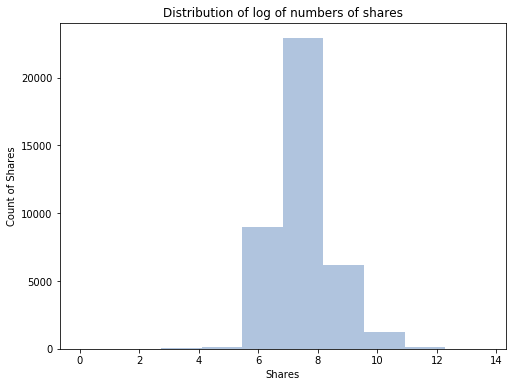

### Feature Exploration 
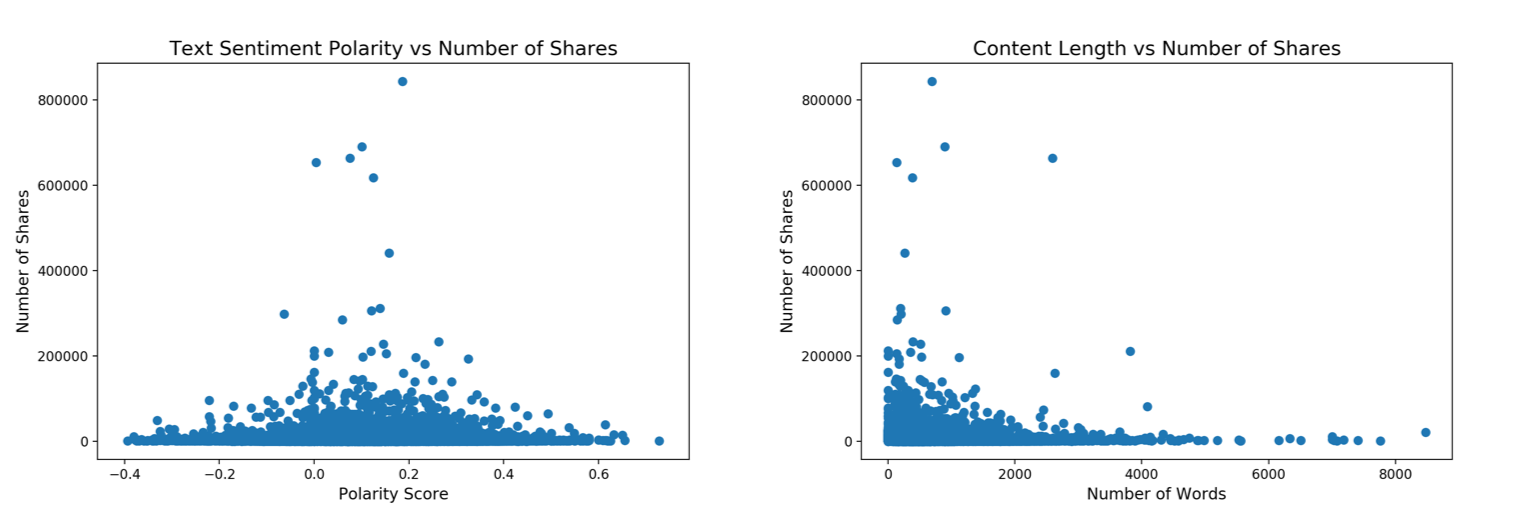

<center><h2>  💻Model - Evaluation Metric and Model Selection  </h2></center>
<br></br>

Regression Model 
- Predict Number of Shares ➡️ **Median Absolute Error (MedAE)**


1. Create Pipelines
    - scaler - StandardScaler()
    - regressor - Lasso, Ridge and Random Forest Regressor
2. Fit models
3. Evaluation

In [7]:
# function to create pipelines for different regression algorithms
def regr_pipeline():
    """
    Create a pipeline for each regression algorithm:
    1. Lasso
    2. Ridge
    3. Random Forest Regressor

    Use StandardScaler() on numerical features if necessary.
    Return a list of pipelines.
    """
    num_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 37, 38, 39, 40,
                   41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57]
    num_transformer = Pipeline(steps=[("scaler", StandardScaler())])
    preprocessor = ColumnTransformer(
        transformers=[("num", num_transformer, num_indices)], remainder="passthrough")

    lasso = Pipeline(steps=[("preprocessor", preprocessor),
                            ("regressor", LassoCV(cv=5, max_iter=1500, random_state=1))])
    ridge = Pipeline(
        steps=[("preprocessor", preprocessor), ("regressor", RidgeCV(cv=5))])
    rf_regr = Pipeline(
        steps=[("regressor", RandomForestRegressor(n_estimators=100, random_state=1))])
    pipelines = [lasso, ridge, rf_regr]
    return pipelines

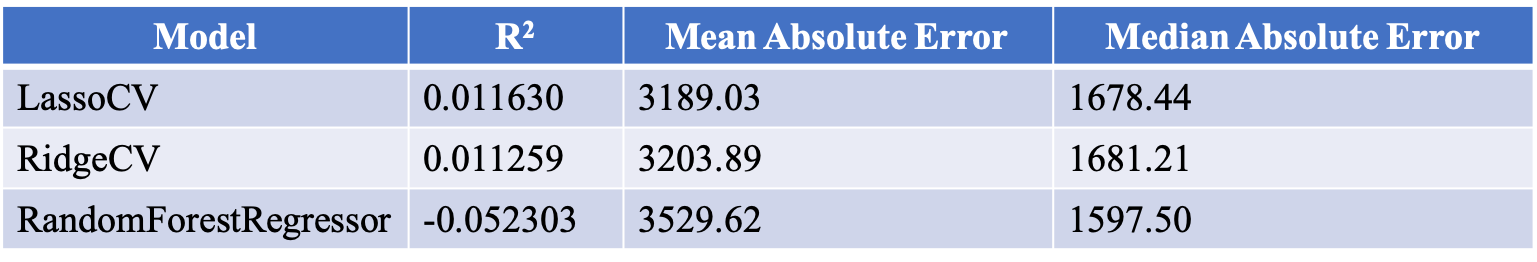

#### Summary
- 3 regression algorithms, MedAE as North Star metric
- Large MedAE ( > 1600)
- Classification might make more sense

### Classification Model
  
 
- Binary Classification: Predict Popular or Unpopular ➡️ **F1 Score**

### Redo the EDA Again 😹      
   1. Choosing the Threshold --- **Mean(1400) or Median(3395)?**
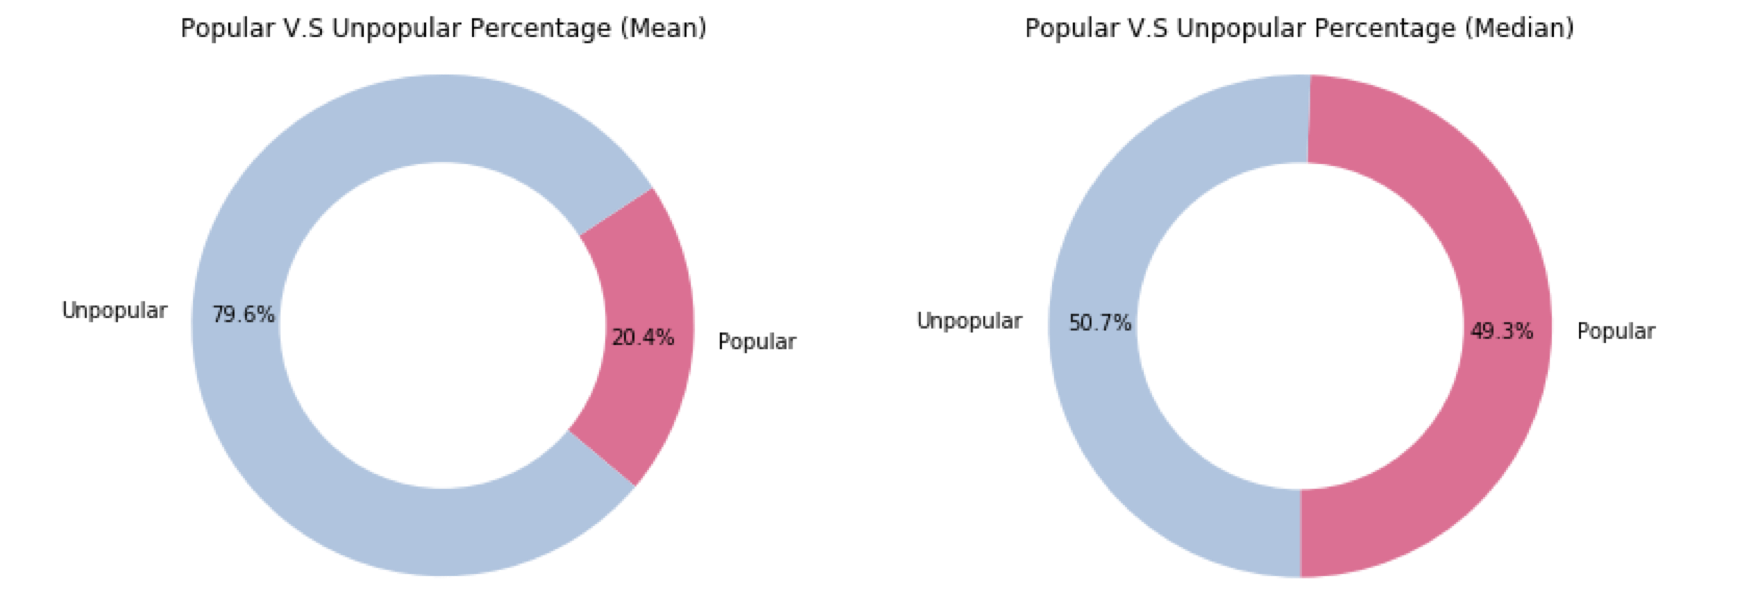

### Weekend or Weekday?  
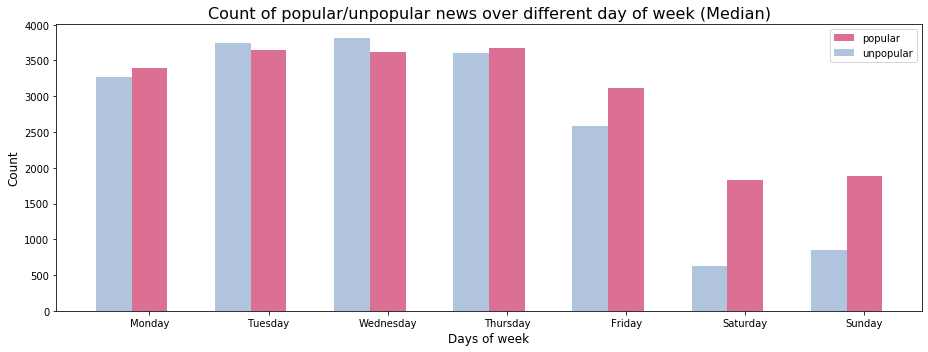

### Which Channel? 
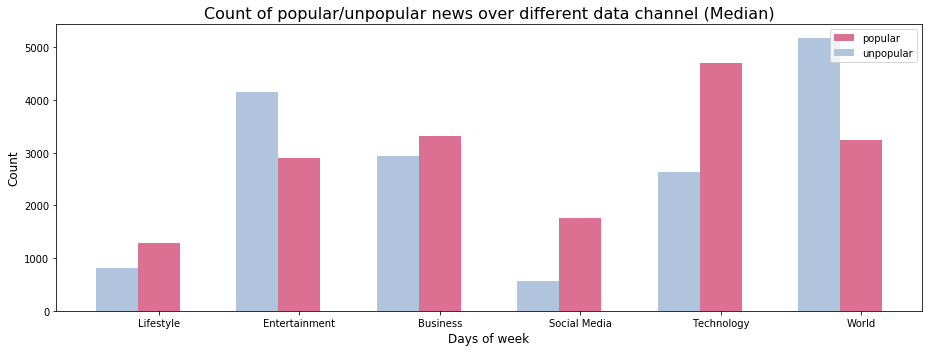

2. Build Pipelines
    - scaler - StandardScaler()
    - classifier - \
      LogisticRegressionCV\
      KNeighborsClassifier\
      GaussianNB\
      RandomForestClassifier

In [17]:
# function to create pipelines for different classification algorithms
def binary_pipeline():
    """
    Create a pipeline for each classification algorithm:
    1. Logistic Regression
    2. K-Nearest Neighbors
    3. Naive Bayes
    4. Random Forest Classifier

    Use StandardScaler() on numerical features if necessary.
    Return a list of pipelines.
    """
    num_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 37, 38, 39, 40,
                   41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57]
    num_transformer = Pipeline(steps=[("scaler", StandardScaler())])
    preprocessor = ColumnTransformer(
        transformers=[("num", num_transformer, num_indices)], remainder="passthrough")

    logistic = Pipeline(steps=[("preprocessor", preprocessor),
                               ("clf", LogisticRegressionCV(cv=5, max_iter=50, solver="newton-cg", random_state=1))])
    knn = Pipeline(steps=[("preprocessor", preprocessor),
                          ("clf", KNeighborsClassifier())])
    bayes = Pipeline(
        steps=[("preprocessor", preprocessor), ("clf", GaussianNB())])
    rf_clf = Pipeline(
        steps=[("clf", RandomForestClassifier(n_estimators=100, random_state=1))])
    pipelines = [logistic, knn, bayes, rf_clf]
    return pipelines

3. Fit Models & Model Evaluation

    - F1-score = $\frac{2*precision*recall}{precision+recall}$
    - F1-score is used when the False Negatives and False Positives are crucial
    - F1-score is a better metric when there are imbalanced classes

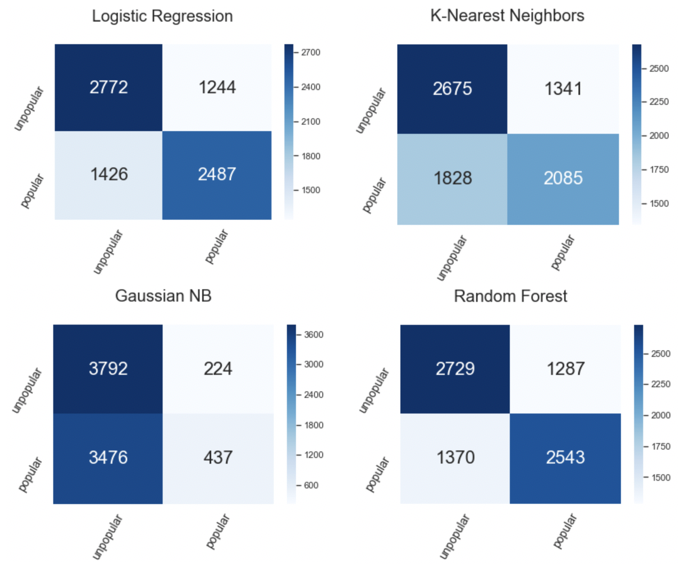

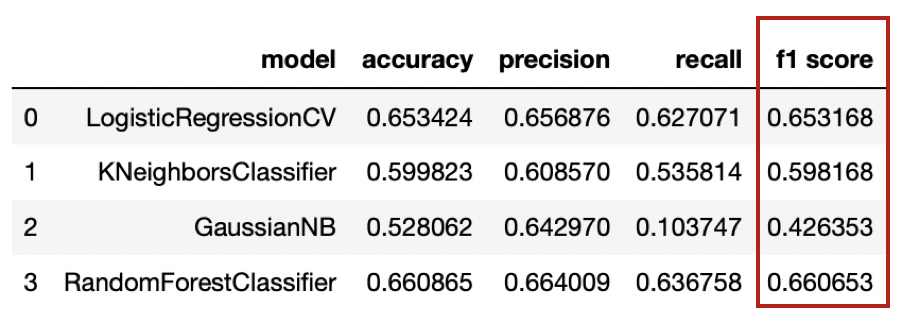


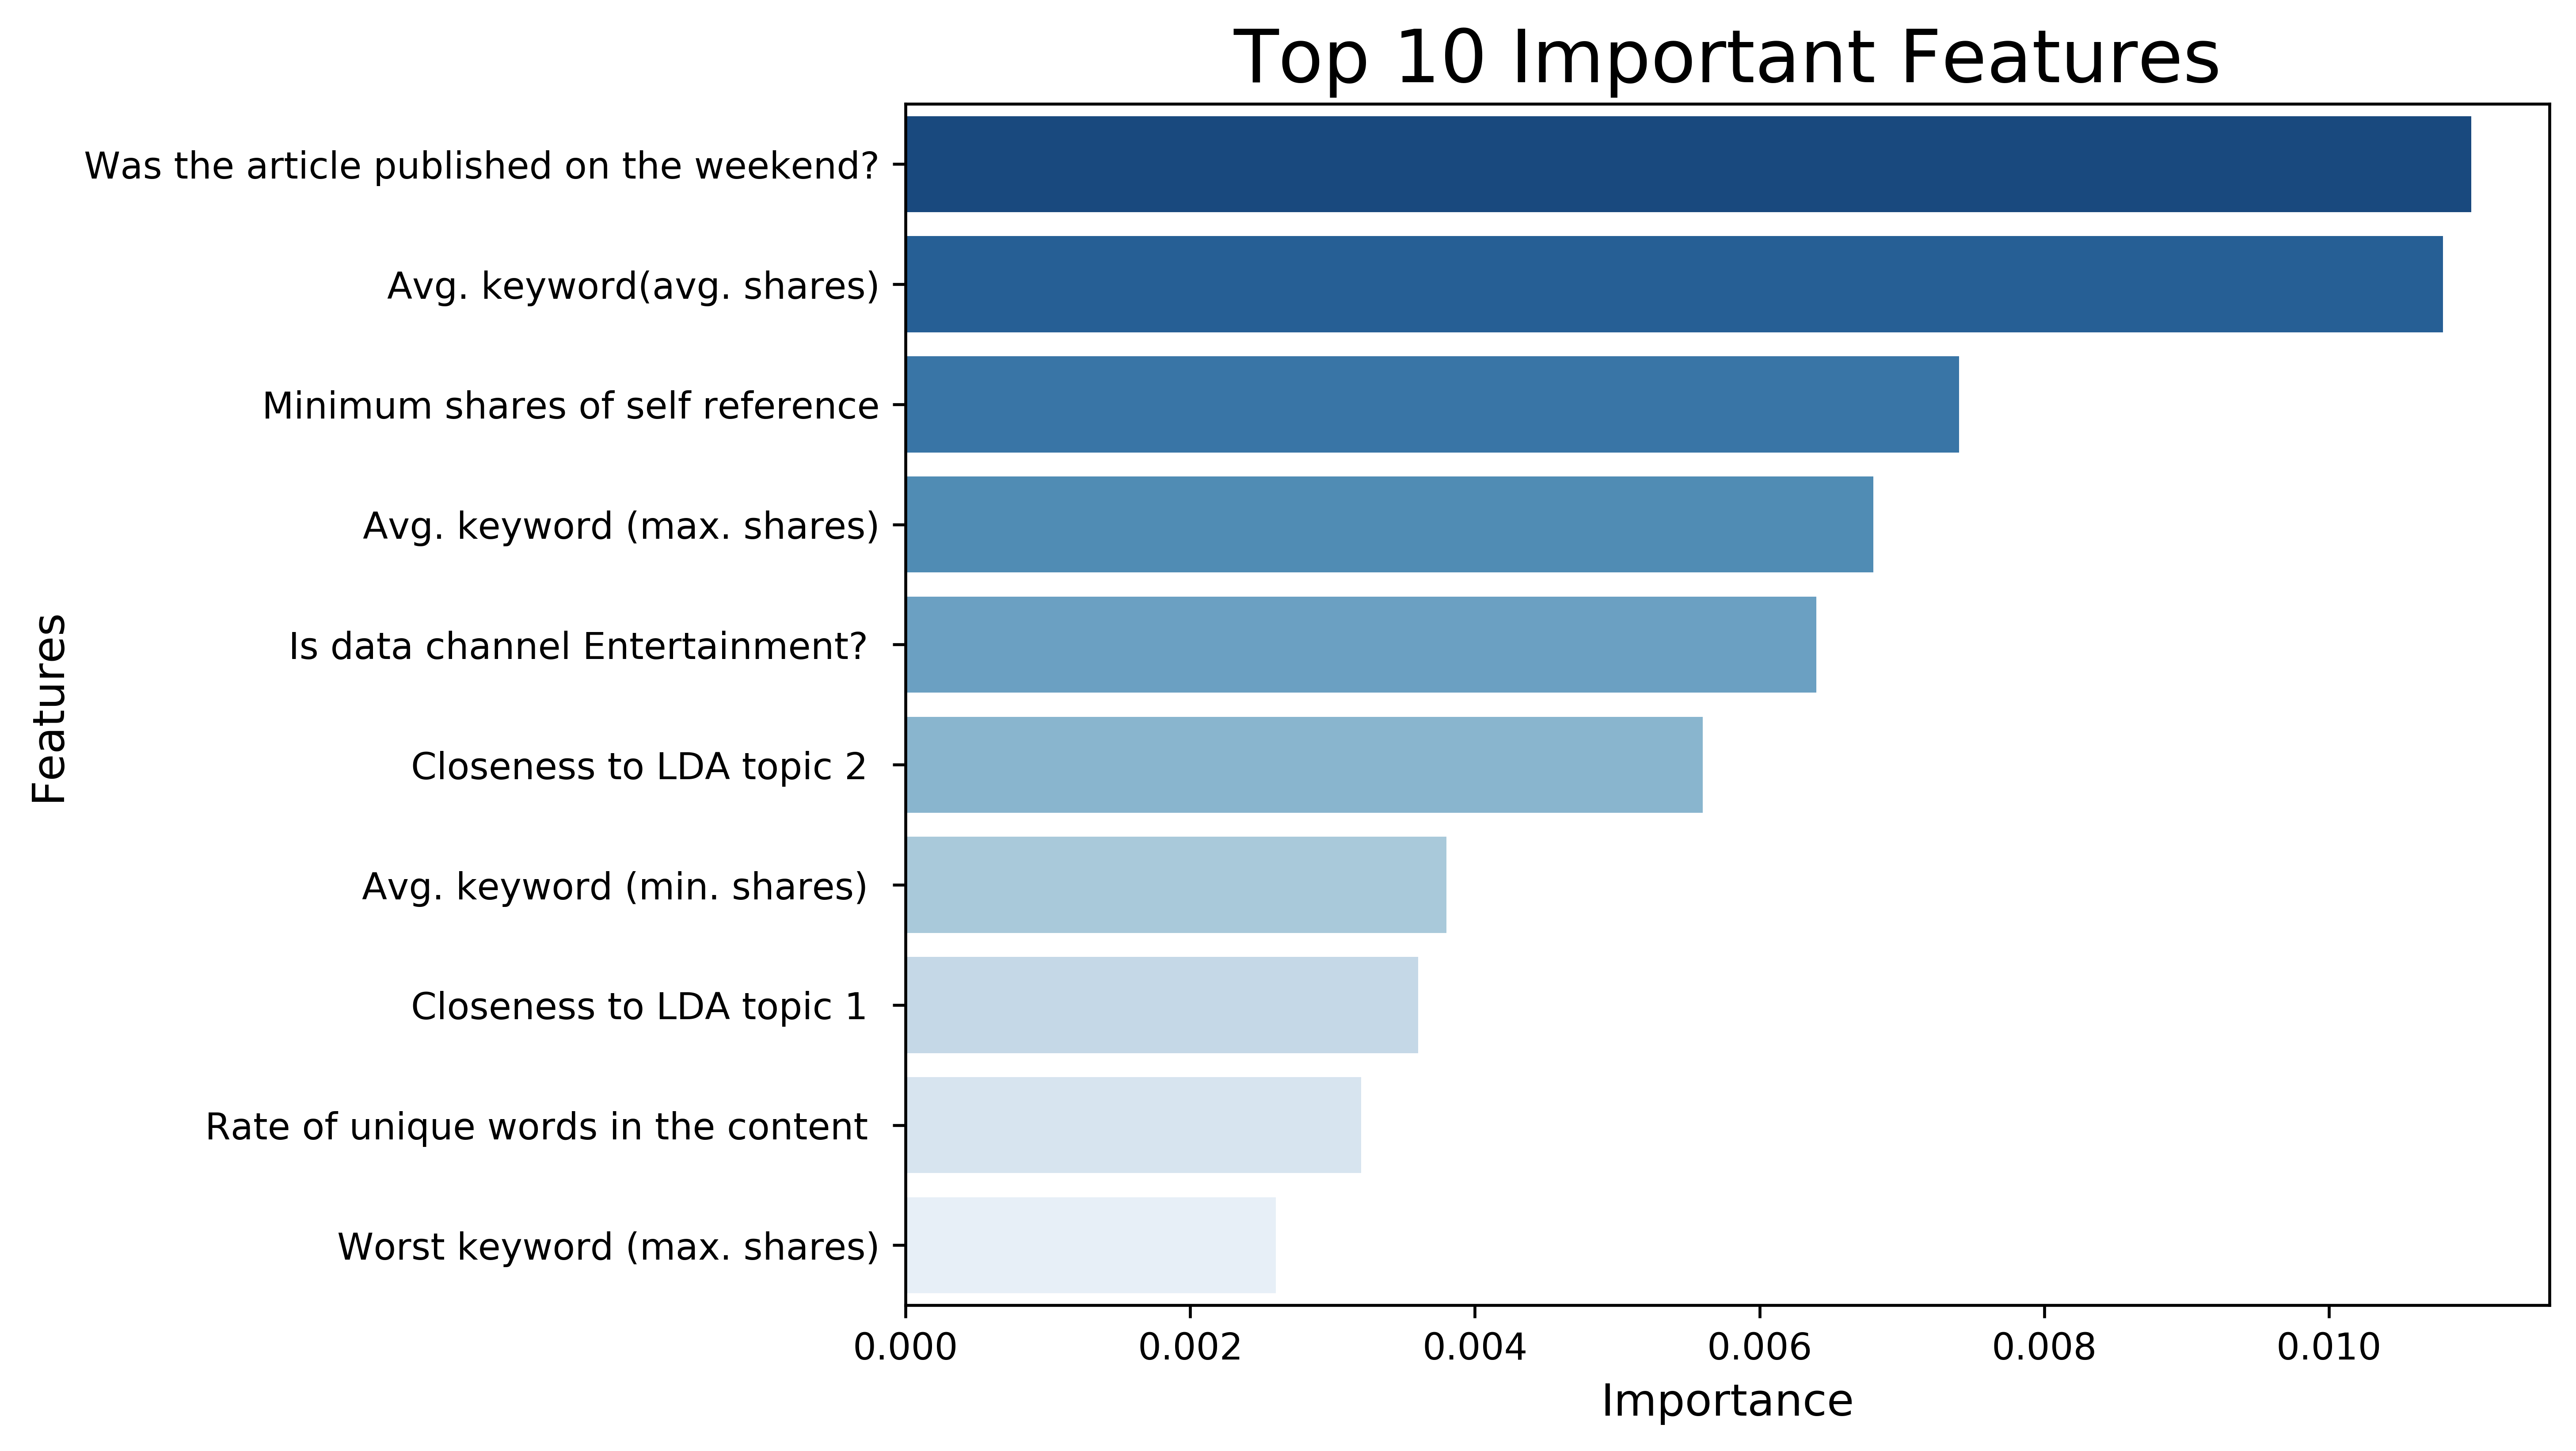

<center><h2> ✍🏻Deliver - Takeaway </h2></center>

- Using f1-score as North Star Metric, Random Forest is the best model.
- Recommendations for reporters and business entities:\
(1) Keywords are important.\
(2) Publication time matters. \
(3) Reference article with high popularity would help.

In [3]:
# general imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from calendar import day_name
from rfpimp import *

from sklearn.linear_model import LassoCV, RidgeCV, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, median_absolute_error, accuracy_score, precision_score,\
    recall_score, f1_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', 62)

In [4]:
# load data
news = pd.read_csv("../raw_data/OnlineNewsPopularity.csv")

# delete the white space before each column name
news.columns = [col.strip(" ") for col in news.columns]
news.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [5]:
# choose features and target
X = news.iloc[:, 2:60]  # all columns except url and target
y = news["shares"].values.ravel()  # target: number of shares

# train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True)

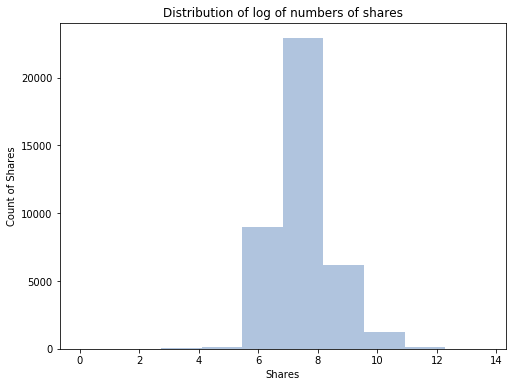

In [6]:
plt.figure(figsize=(8, 6))
plt.hist(np.log(y), color='lightsteelblue')
plt.xlabel("Shares")
plt.ylabel("Count of Shares")
plt.title("Distribution of log of numbers of shares")
plt.savefig(fname="Distribution of log of numbers of shares", dpi=400)
plt.show()

In [8]:
# fit models with train data
# evaluate models with test data (r^2, mean absolute error and median absolute error)
regr_pipelines = regr_pipeline()
regr_eval = []

for pipeline in regr_pipelines:
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    model_name = pipeline.named_steps['regressor'].__class__.__name__.split(
        '.')[-1]
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    medae = median_absolute_error(y_test, y_pred)
    regr_eval.append([model_name, r2, mae, medae])

In [9]:
# look at evaluation metrics
regr_eval = pd.DataFrame(regr_eval)
regr_eval.columns = ["model", "r2",
                     "mean absolute error", "median absolute error"]
regr_eval

,model,r2,mean absolute error,median absolute error
0,LassoCV,-0.152977,3181.452487,1654.368824
1,RidgeCV,0.013147,3123.180911,1648.755036
2,RandomForestRegressor,-0.014896,3469.564257,1583.540000


In [10]:
# add a column with two classes, 0 for unpopular (shares <= 1400) and 1 for popular (shares > 1400)
median = np.median(news["shares"])
news_binary_median = news.assign(popularity=0)
news_binary_median.loc[news_binary_median["shares"] > median, "popularity"] = 1
# add a column with two classes, 0 for unpopular (shares <= 1400) and 1 for popular (shares > 1400)
mean = np.mean(news["shares"])
news_binary_mean = news.assign(popularity=0)
news_binary_mean.loc[news_binary_median["shares"] > mean, "popularity"] = 1

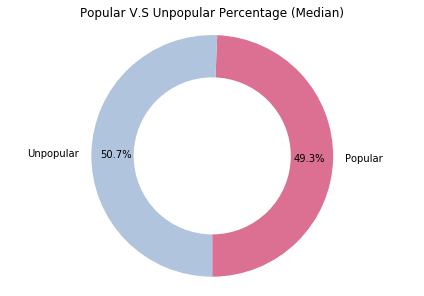

<Figure size 432x288 with 0 Axes>

In [11]:
# Pie chart
x = ['Popular', 'Unpopular']
num = [19562, 20082]
# colors
colors = ['palevioletred', 'lightsteelblue']

# plt.figure(figsize=(8, 8))

fig1, ax1 = plt.subplots()
ax1.pie(num, colors=colors, labels=x, autopct='%1.1f%%', startangle=270,
        pctdistance=0.8)

# draw circle
centre_circle = plt.Circle((0, 0), 0.65, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.title("Popular V.S Unpopular Percentage (Median)")
plt.show()
plt.savefig('popularvsunpopular.png', dpi=400)

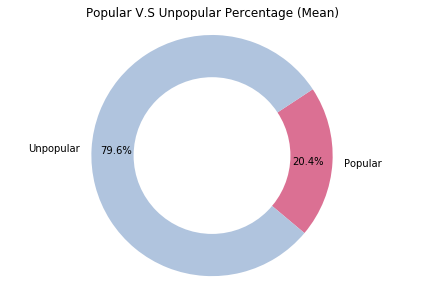

<Figure size 432x288 with 0 Axes>

In [12]:
# Pie chart
x_mean = ['Popular', 'Unpopular']
num_mean = [8079, 31565]
# colors
colors = ['palevioletred', 'lightsteelblue']

# plt.figure(figsize=(8, 8))

fig1, ax1 = plt.subplots()
ax1.pie(num_mean, colors=colors, labels=x_mean, autopct='%1.1f%%', startangle=320,
        pctdistance=0.8)

# draw circle
centre_circle = plt.Circle((0, 0), 0.65, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.title("Popular V.S Unpopular Percentage (Mean)")
plt.show()
plt.savefig('popularvsunpopular.png', dpi=400)

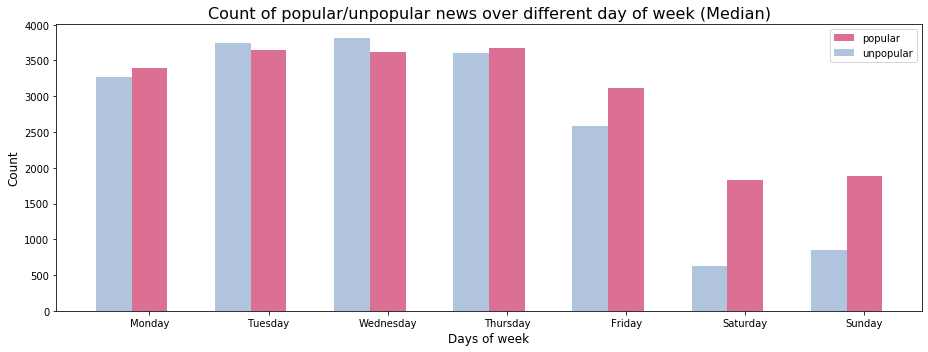

In [13]:
# select colume for the bar chart
Wd = news.columns.values[31:38]
Wd2 = np.array(['Monday', 'Tuesday', 'Wednesday',
                'Thursday', 'Friday', 'Saturday', 'Sunday'])

# bar chart
Unpop2 = news[news['shares'] < median]
Pop2 = news[news['shares'] >= median]
Unpop_day2 = Unpop2[Wd].sum().values
Pop_day2 = Pop2[Wd].sum().values
fig = plt.figure(figsize=(13, 5))
plt.title(
    "Count of popular/unpopular news over different day of week (Median)", fontsize=16)
plt.bar(np.arange(len(Wd)), Pop_day2, width=0.3, align="center", color='palevioletred',
        label="popular")
plt.bar(np.arange(len(Wd)) - 0.3, Unpop_day2, width=0.3, align="center", color='lightsteelblue',
        label="unpopular")
plt.xticks(np.arange(len(Wd)), Wd2)
plt.ylabel("Count", fontsize=12)
plt.xlabel("Days of week", fontsize=12)

plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

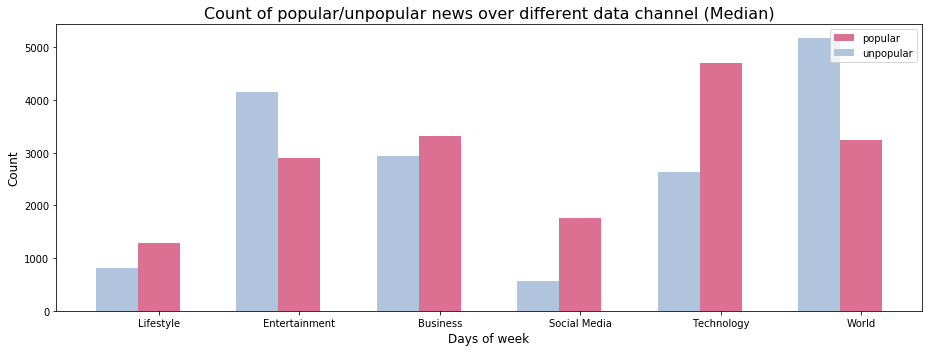

In [14]:
# select columns for the bar chart
Dc = news.columns.values[13:19]
Dc2 = np.array(['Lifestyle', 'Entertainment', 'Business',
                'Social Media', 'Technology', 'World'])

# bar chart
Unpop4 = news[news['shares'] < median]
Pop4 = news[news['shares'] >= median]
Unpop_day4 = Unpop4[Dc].sum().values
Pop_day4 = Pop4[Dc].sum().values
fig = plt.figure(figsize=(13, 5))
plt.title(
    "Count of popular/unpopular news over different data channel (Median)", fontsize=16)
plt.bar(np.arange(len(Dc)), Pop_day4, width=0.3, align="center", color='palevioletred',
        label="popular")
plt.bar(np.arange(len(Dc)) - 0.3, Unpop_day4, width=0.3, align="center", color='lightsteelblue',
        label="unpopular")
plt.xticks(np.arange(len(Dc)), Dc2)
plt.ylabel("Count", fontsize=12)
plt.xlabel("Days of week", fontsize=12)

plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [18]:
# choose features and target
X = news_binary_median.iloc[:, 2:60]  # all columns except url and target
y = news_binary_median["popularity"].values.ravel()  # target: popularity level

# train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True)

In [19]:
# fit models with train data
# evaluate models with test data (accuracy, precision, recall, f1 score, confusion_matrix and classification report)
binary_pipelines = binary_pipeline()
clf_eval = []

for pipeline in binary_pipelines:
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    model_name = pipeline.named_steps['clf'].__class__.__name__.split('.')[-1]
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    conf_mat = confusion_matrix(y_test, y_pred)
    clf_report = classification_report(y_test, y_pred)
    clf_eval.append([model_name, accuracy, precision,
                     recall, f1, conf_mat, clf_report])

In [20]:
# feature importance of random forest classifier
rf_clf = binary_pipelines[-1].named_steps["clf"]
imp = importances(rf_clf, X_test, pd.DataFrame(y_test))

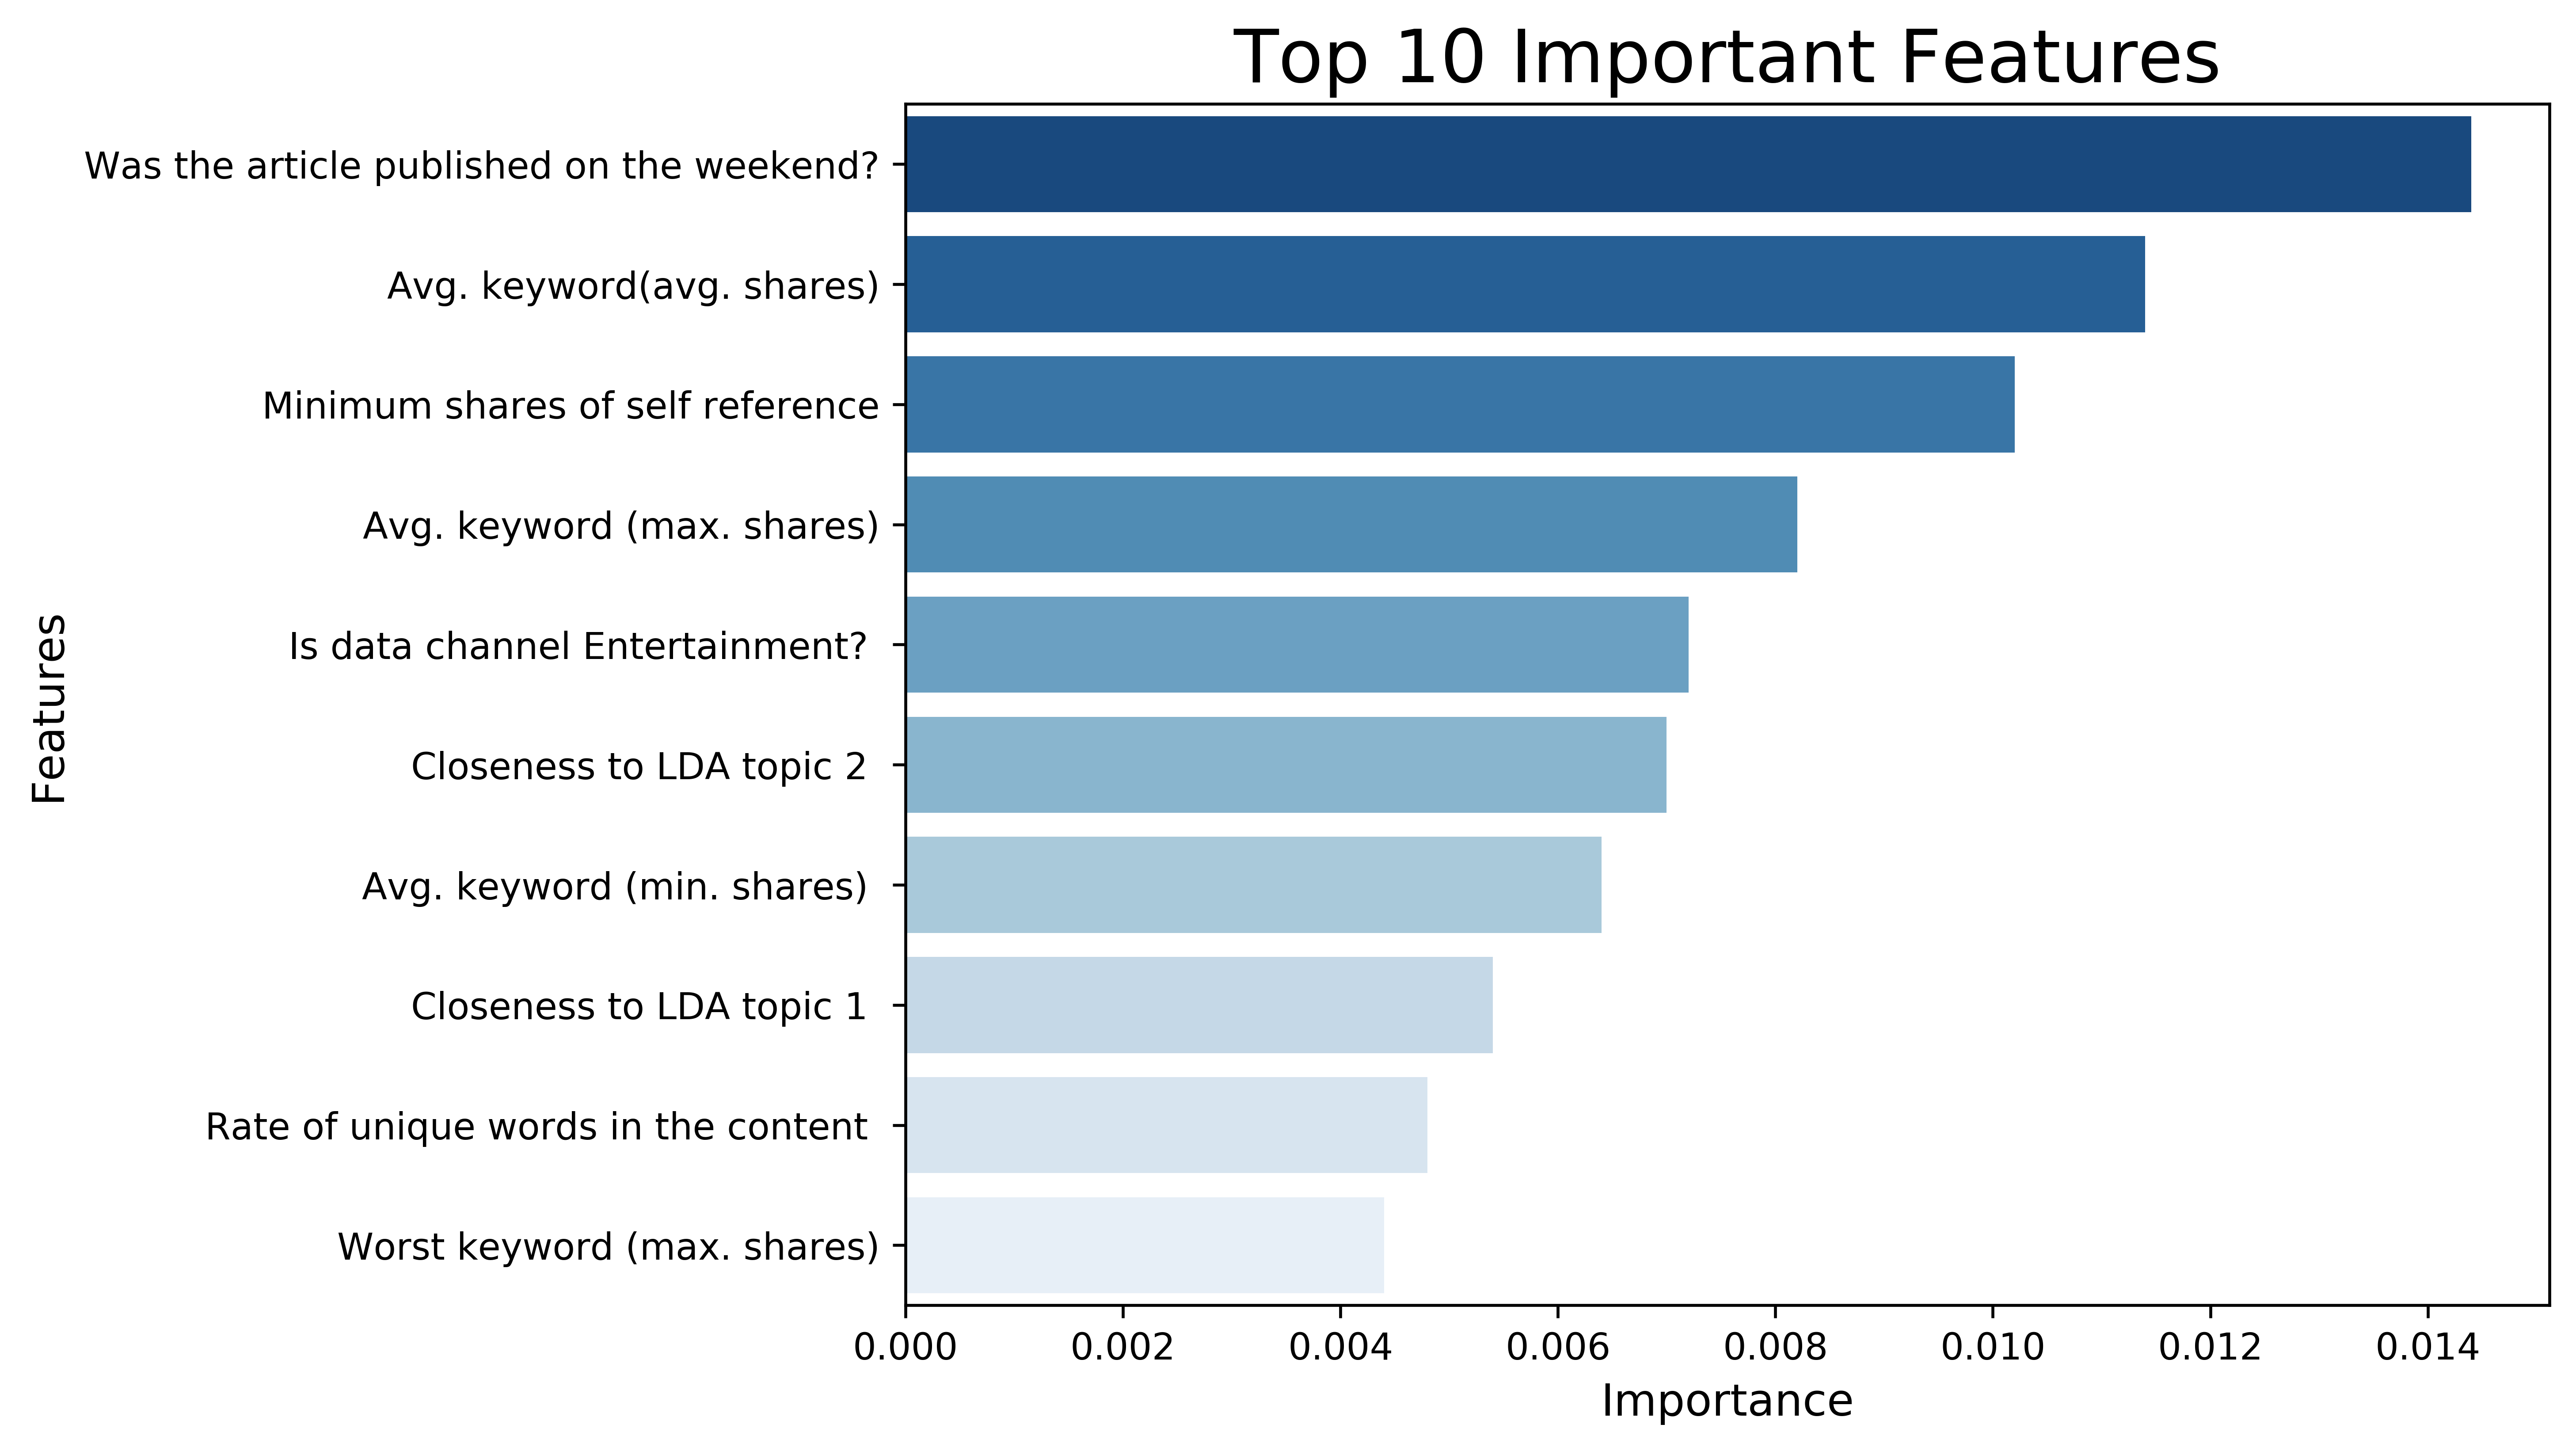

,Feature,Importance,Features
0,kw_avg_avg,0.0144,Was the article published on the weekend?
1,self_reference_min_shares,0.0114,Avg. keyword(avg. shares)
2,is_weekend,0.0102,Minimum shares of self reference
3,LDA_02,0.0082,Avg. keyword (max. shares)
4,global_rate_negative_words,0.0072,Is data channel Entertainment?
5,data_channel_is_entertainment,0.0070,Closeness to LDA topic 2
6,kw_max_avg,0.0064,Avg. keyword (min. shares)
7,LDA_00,0.0054,Closeness to LDA topic 1
8,rate_positive_words,0.0048,Rate of unique words in the content
9,average_token_length,0.0044,Worst keyword (max. shares)


In [21]:
# plot feature importance
imp_top10 = imp[:10].reset_index()
imp_top10['Features'] = ['Was the article published on the weekend?', 'Avg. keyword(avg. shares)',
                        'Minimum shares of self reference','Avg. keyword (max. shares)',
                        'Is data channel Entertainment? ', 'Closeness to LDA topic 2 ',
                        'Avg. keyword (min. shares) ', 'Closeness to LDA topic 1 ',
                        'Rate of unique words in the content ','Worst keyword (max. shares)']
plt.figure(figsize=(8, 6), dpi=600)
sns.barplot(x="Importance", y="Features", data=imp_top10, palette="Blues_r")
plt.title("Top 10 Important Features", size=20)
plt.xlabel("Importance", size=12)
plt.xticks(size=10)
plt.ylabel("Features", size=12)
plt.yticks(size=10)
plt.savefig(fname="Importance Features", dpi=200)
plt.show()
imp_top10